<h2> II. Programming and critical analysis [7v]
                           
<h4> Consider the heart-disease.csv dataset available at the course webpage’s homework tab. Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
import scipy.stats as stats

data = pd.read_csv('heart-disease.csv')

<h4>  1)  Compare the performance of a 𝑘𝑁𝑁 with 𝑘 = 5 and a naïve Bayes with Gaussian
assumption (consider all remaining parameters as default):

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.


Precisão do kNN:        [0.623 0.574 0.672 0.7   0.7  ]
Precisão do Naive Baye: [0.885 0.803 0.803 0.85  0.833]


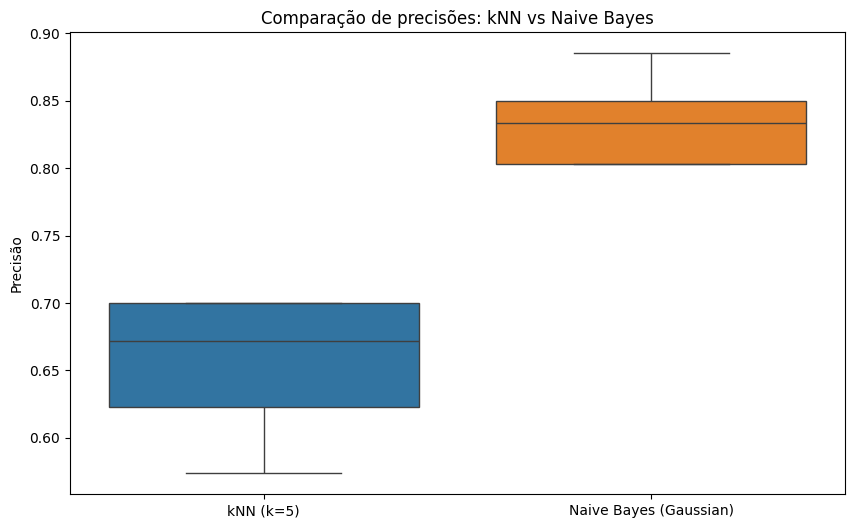

In [3]:
x = data.drop('target', axis=1)
y = data['target']

knn = KNeighborsClassifier(n_neighbors=5)
naiveBayes = GaussianNB()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

acc1 = cross_val_score(knn, x, y, cv=skf, scoring='accuracy')
acc2 = cross_val_score(naiveBayes, x, y, cv=skf, scoring='accuracy')

print("Precisão do kNN:       ", np.round(acc1, 3))
print("Precisão do Naive Baye:", np.round(acc2, 3))

labels = ['kNN (k=5)', 'Naive Bayes (Gaussian)']
plt.figure(figsize=(10, 6))
sns.boxplot(data=[acc1, acc2])
plt.xticks([0, 1], labels)  

plt.title('Comparação de precisões: kNN vs Naive Bayes')
plt.ylabel('Precisão')
plt.show()


&nbsp;&nbsp;&nbsp;Analisando os boxplots, verificamos que o modelo Naive Bayes Gaussiano tem melhores e mais consistentes níveis de precisão. Um fator que pode contribuir para tal, é o facto da dimensionalidade dos nossos dados ser bastante elevada (13 variáveis). Uma das fraquezas do modelo kNN é o facto de as contribuições de um subset de variáveis mais importantes ficar diluido por todas as variáveis. Isto explica o baixo nivel de precisão e falta de consistência do modelo kNN quando comparado ao Naive Bayes.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [1.0v] Report the accuracy of both models, this time scaling the data with a
Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an
explanation for the results.

Precisão do kNN com escala Min-Max:        [0.836 0.803 0.852 0.833 0.783]
Precisão do Naive Baye com escala Min-Max: [0.885 0.803 0.803 0.85  0.833]


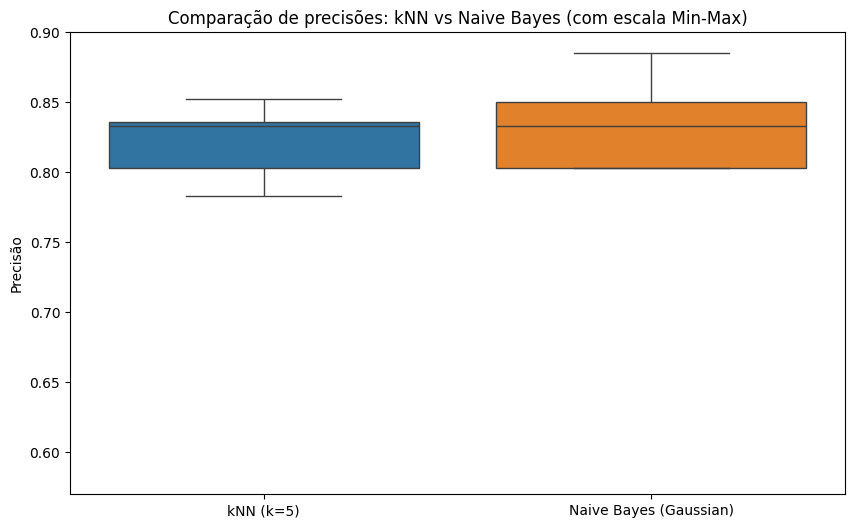

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

acc1_scaled = cross_val_score(knn, x_scaled, y, cv=skf, scoring='accuracy')
acc2_scaled = cross_val_score(naiveBayes, x_scaled, y, cv=skf, scoring='accuracy')

print("Precisão do kNN com escala Min-Max:       ", np.round(acc1_scaled, 3))
print("Precisão do Naive Baye com escala Min-Max:", np.round(acc2_scaled, 3))

plt.figure(figsize=(10, 6))
sns.boxplot(data=[acc1_scaled, acc2_scaled])
plt.xticks([0, 1], labels)
plt.ylim(0.57, 0.90)
plt.title('Comparação de precisões: kNN vs Naive Bayes (com escala Min-Max)')
plt.ylabel('Precisão')
plt.show()

&nbsp;&nbsp;&nbsp;Ao analizar o boxplot, observa-se um aumento significativo na precisão do modelo kNN após a aplicação do Min-Max Scaling. Isso ocorre porque, uma vez que as variáveis não são identicamente distribuidas, ao normalizar as variáveis para o mesmo intervalo (0 a 1, por exemplo), evita-se que variáveis com escalas maiores dominem o cálculo das distâncias, garantindo assim que todas as variáveis contribuam de maneira equilibrada para o modelo. Por outro lado, no caso do Naive Bayes, não houve alteração no desempenho, uma vez que este algoritmo baseia-se em probabilidades e não depende de distâncias entre os pontos.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. [1.0v] Using scipy, test the hypothesis “the 𝑘𝑁𝑁 model is statistically superior to
naïve Bayes regarding accuracy”, asserting whether it is true.

In [5]:
t_stat, p_value = stats.ttest_rel(acc1, acc2, alternative='greater')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Rejeita a hipótese nula para p = 0.05. kNN é estatisticamente superior ao Naive Bayes no que toca a precisão.")
else:
    print("Não se rejeita a hipótese nula para p = 0.05: kNN não é estatisticamente superior ao Naive Bayes no que toca a precisão.")

T-statistic: -6.690315237001677, P-value: 0.9987020187220139
Fail to reject the null hypothesis: kNN is not statistically superior to Naive Bayes regarding accuracy.


<h4>  2)  Using a 80-20 train-test split, vary the number of neighbors of a 𝑘𝑁𝑁 classifier using
𝑘 = {1, 5, 10, 20, 30}. Additionally, for each 𝑘, train one classifier using uniform weights
and distance weights.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. [1.0v] Plot the train and test accuracy for each model.

Precisões no conjunto de treino: {'uniform': [np.float64(1.0), np.float64(0.744), np.float64(0.707), np.float64(0.678), np.float64(0.686)], 'distance': [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]}
Precisões no conjunto de teste: {'uniform': [np.float64(0.656), np.float64(0.705), np.float64(0.705), np.float64(0.672), np.float64(0.705)], 'distance': [np.float64(0.656), np.float64(0.705), np.float64(0.721), np.float64(0.705), np.float64(0.754)]}


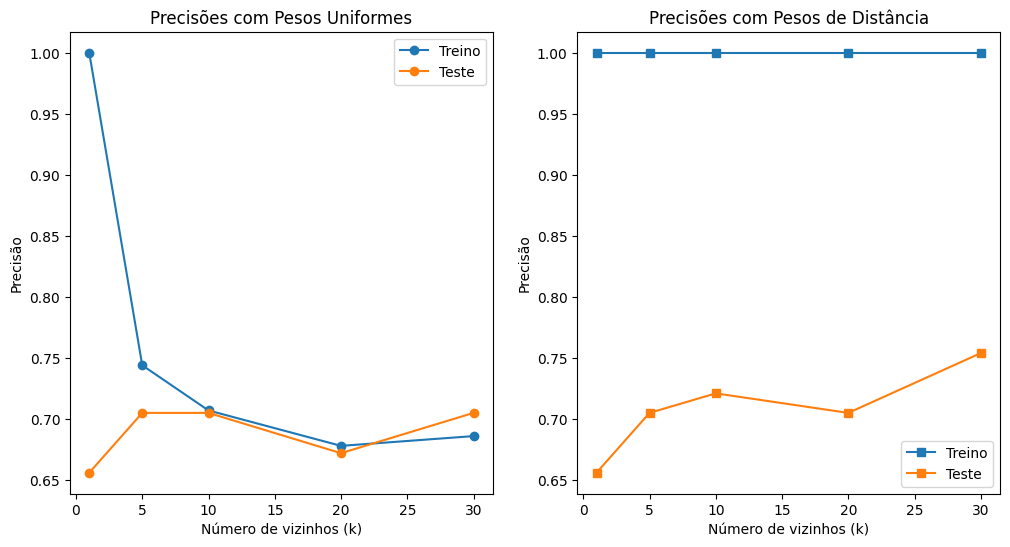

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

k_values = [1, 5, 10, 20, 30]
weights = ['uniform', 'distance']

accuracies_train = {peso: [] for peso in weights}
accuracies_test = {peso: [] for peso in weights}

for peso in weights:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=peso)
        knn.fit(x_train, y_train)
        x_pred_train = knn.predict(x_train)
        accuracies_train[peso].append(np.round(accuracy_score(y_train, x_pred_train), 3))

        x_pred_test = knn.predict(x_test)
        accuracies_test[peso].append(np.round(accuracy_score(y_test, x_pred_test), 3))

print("Precisões no conjunto de treino:" , accuracies_train) 
print("Precisões no conjunto de teste:" , accuracies_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_train['uniform'], label='Treino', marker='o')
plt.plot(k_values, accuracies_test['uniform'], label='Teste', marker='o')

plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Precisão')
plt.title('Precisões com Pesos Uniformes')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracies_train['distance'], label='Treino', marker='s')
plt.plot(k_values, accuracies_test['distance'], label='Teste', marker='s')

plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Precisão')
plt.title('Precisões com Pesos de Distância')
plt.legend()
plt.show()



<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of
the models.

Para baixos números de K, o model vai estar sujeito a uma maior variância, uma vez que os outliers vão ter um maior impacto na classificação das instâncias. A capacidade de generalização será baixa e o risco de overfitting é alto.
Ao aumentar o k, o impacto dos outliers é diluido e as fronteiras de decisão ficam mais suaves, aumentando a capacidade de generalização.
No entanto, para níveis de K muito altos, podemos correr o risco de underfitting. Isto acontece pois para classificar passamos a tomar em conta mais pontos e mais distantes. Esses pontos têm o risco de não ser relevantes para a classificação da instância e criar "noise" na clssificação.

<h4>  3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two
possible difficulties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.

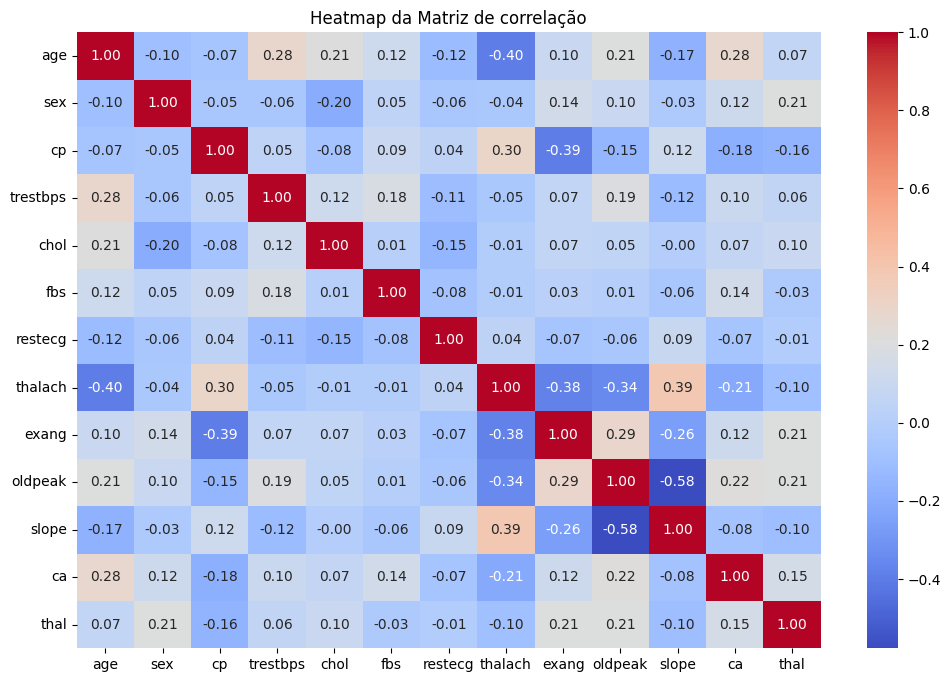

Top 3 pares com maior correlação:
oldpeak  slope     -0.577537
slope    oldpeak   -0.577537
age      thalach   -0.398522
dtype: float64


In [11]:
# Plot a heat map for the correlations between variables
plt.figure(figsize=(12, 8))
matrix = data.drop('target', axis=1).corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Matriz de correlação')
plt.show()

# Print the 3 highest correlated pairs of variables
pares = matrix.unstack().sort_values(key=abs, ascending=False)
# Remove self-correlations
pares = pares[pares < 1]
print("Top 3 pares com maior correlação:")
print(pares.head(3))

Duas dificuldades possiveis que o modelo Naive Bayes pode encontrar neste Data Set são o desprezo da correlação entre variáveis e lidar com variáveis continuas.

Desprezo da correlação - o modelo Naive Bayes parte do principio que não existem relações entre características, o que, ao observar a matrix de correlações, é possível perceber que podemos estar a perder imformação relevante para a classificação de instâncias, como por exemplo a relação inversa entre as variáveis "slope" e "oldpeak".

Variáveis continuas - carecterísticas contínuas como "oldpeak" ou "chol", no algoritmo Naive Bayes é assumido que têm uma distruibuição normal gaussiana. No entanto, isso pode não se verificar na realidade. A curva pode ser desviada para a direita ou para a esquerda, levando a cálculos de probabilidade incorretos e uma redução da precisão do modelo